Machine Learning Model :(Clustering)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


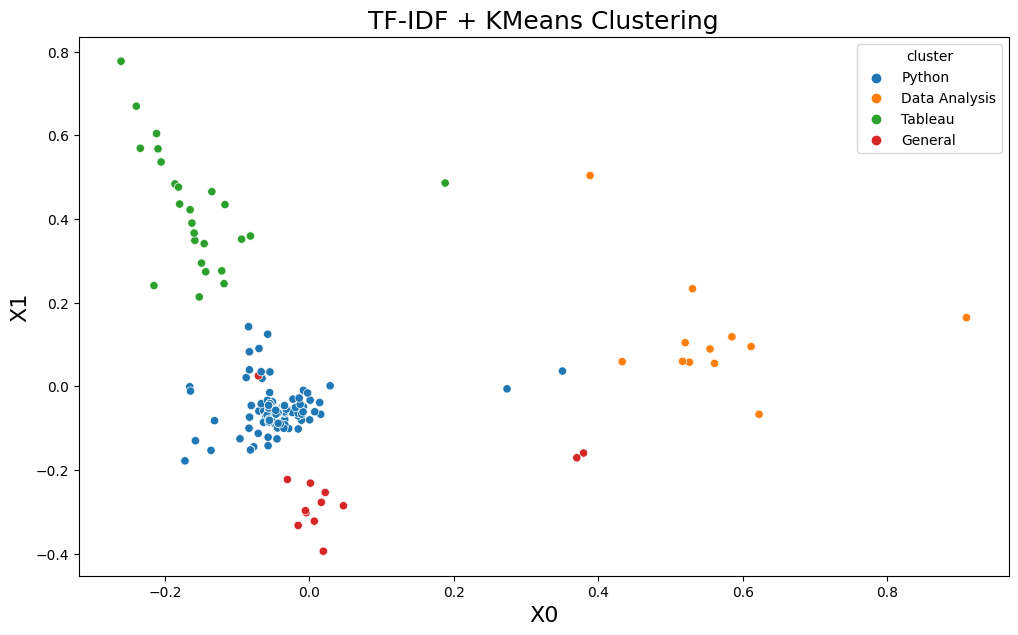

Silhouette Score (KMeans): 0.17212561440704718


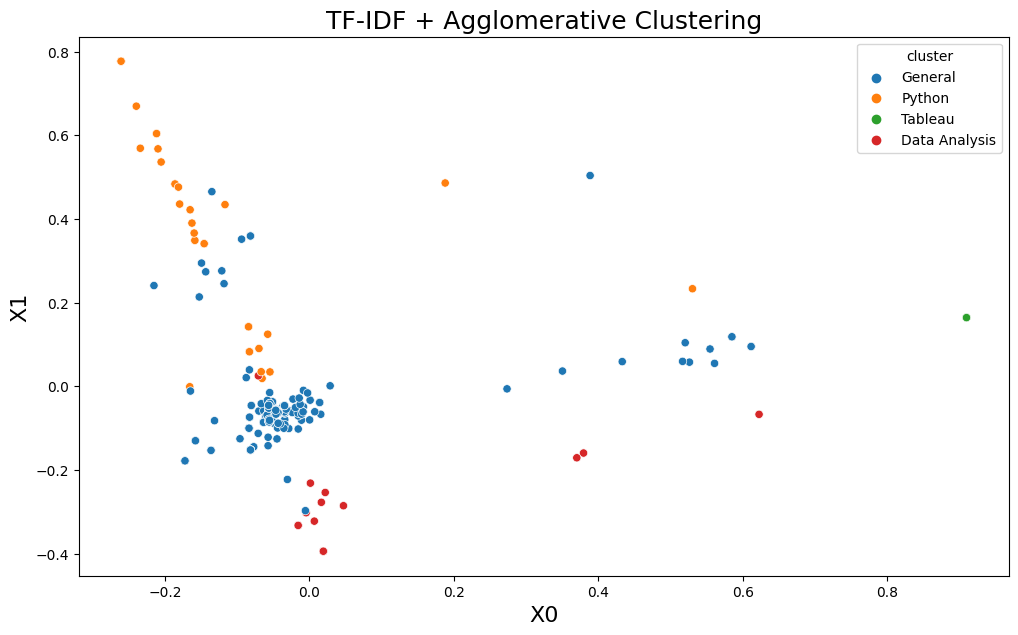

Silhouette Score (Agglomerative): 0.15681117621870674


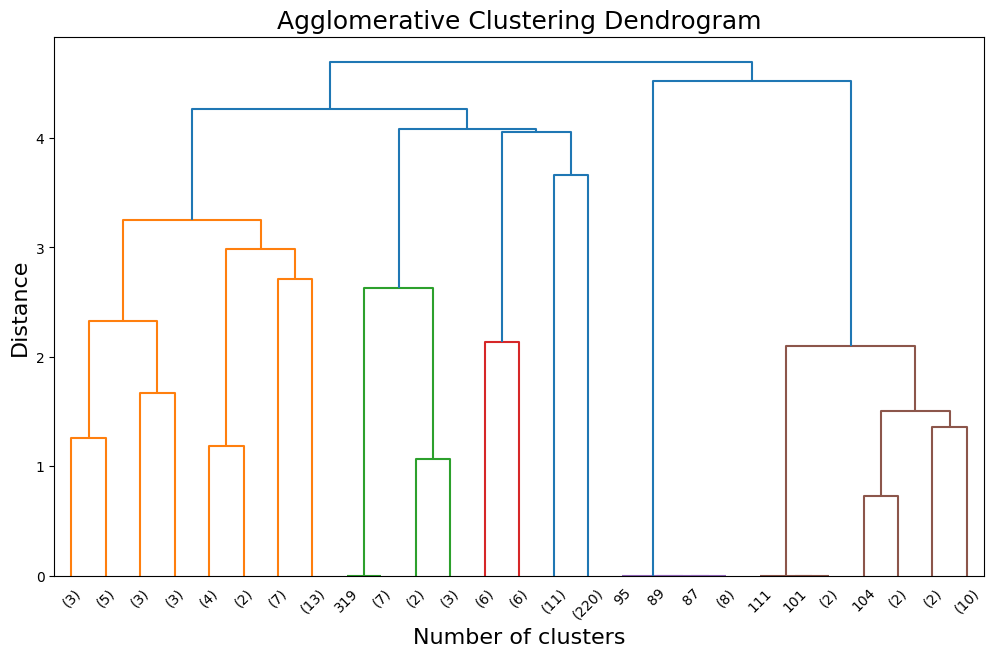

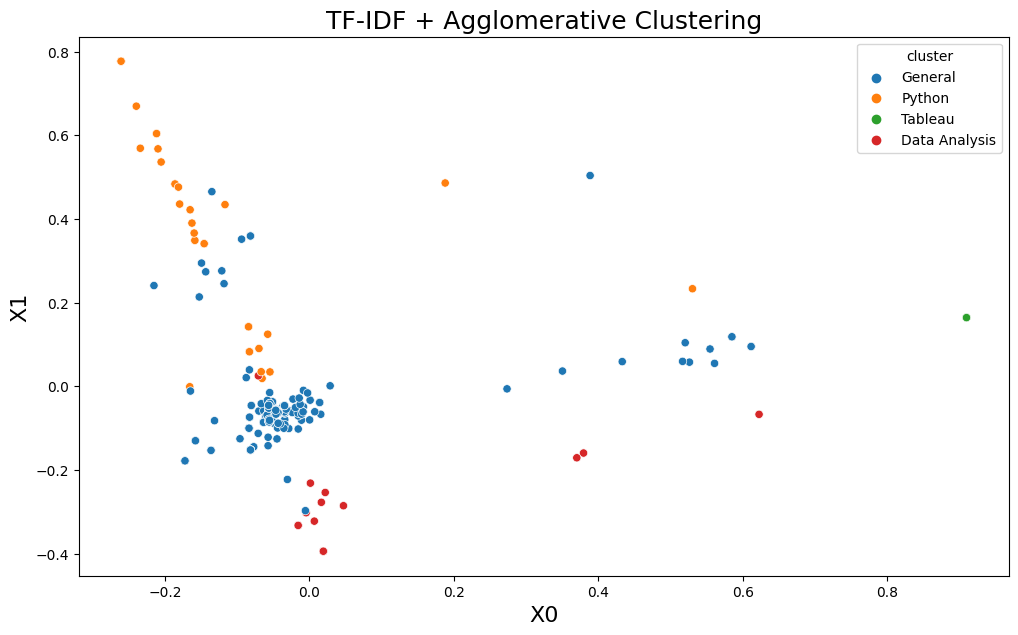

Silhouette Score (Agglomerative): 0.15681117621870674


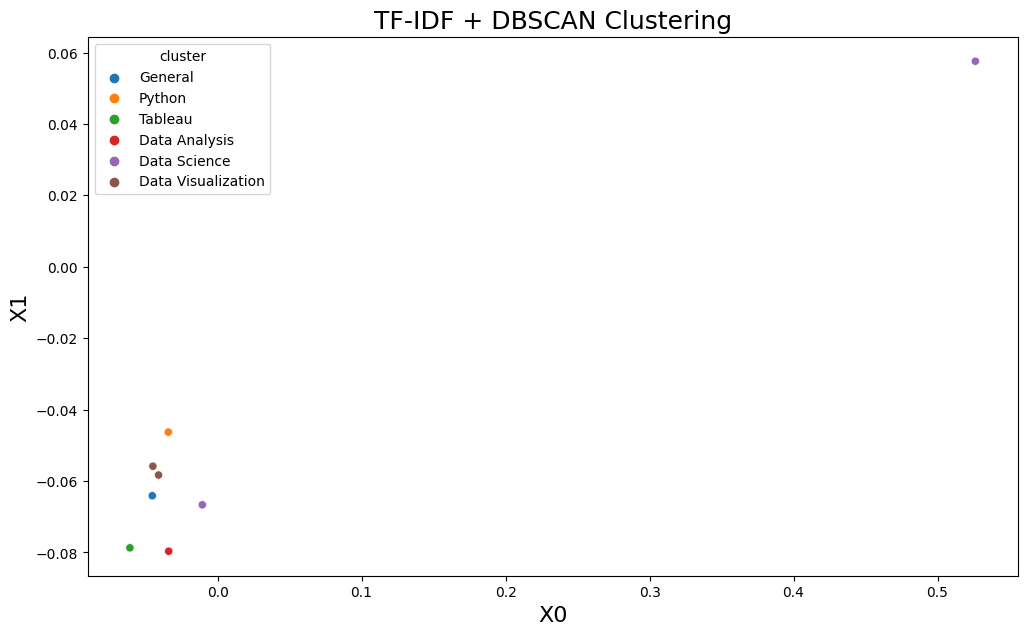

Silhouette Score (DBSCAN): 0.5735211547351307
The word 'Pandas' belongs to Cluster 1 with Code 100.
Questions with the predicted code:
 Is python case sensitive
 What type of language is python
 How to iterate over a Pandas DataFrame
 How to convert pandas dataframe to numpy array
 What is vectorization in Pandas
 What is groupby in Pandas
 How can we create a copy of the series in Pandas
 What is a series in pandas
 How will you add a column to a pandas DataFrame
 How to calculate percentiles when using numpy
 How can you find the indices of an array where a condition is true
 What Is The Difference Between Matrices And Arrays
 What Is The Pref erred Way To Check For An Empty zero Element Array
 What Is The Difference Between Numpy And Scipy
 What is a lambda function in python
 How will you create a series from dict in Pandas
 What is the difference between xrange and xrange in python
 What is the meaning of axis0 and axis1
 Whenever Python exits why isn t all the memory deallocated


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Download stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    text = re.sub(r"http\S+", "", text)  # Remove links
    text = re.sub("[^A-Za-z]+", " ", text)  # Remove special characters and numbers
    if remove_stopwords:
        tokens = nltk.word_tokenize(text)  # Tokenize
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]  # Remove stopwords
        text = " ".join(tokens)  # Join back together
    text = text.lower().strip()  # Convert to lowercase and strip whitespaces
    return text


# Load the dataset
df = pd.read_csv("Final.csv")
# df = df.drop('Unnamed: 0', axis=1)
num_rows = df.shape[0]
df.insert(0, "Sr.no", range(1, num_rows + 1))
df['cleaned'] = df['Question'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

# Initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=4, max_df=0.98)
# Apply TF-IDF to the cleaned texts
X = vectorizer.fit_transform(df['cleaned'])

# Clustering Algorithms
algorithms = {
    "KMeans": KMeans(n_clusters=4),
    "Agglomerative": AgglomerativeClustering(n_clusters=4),
    "DBSCAN": DBSCAN(eps=0.7, min_samples=2)
}

# Perform clustering with different algorithms
for algorithm_name, algorithm in algorithms.items():
    # Fit the clustering model
    algorithm.fit(X.toarray())
    # Store cluster labels in a variable
    clusters = algorithm.labels_

    # Initialize PCA with 2 components
    pca = PCA(n_components=2, random_state=42)
    # Apply PCA to the TF-IDF vectors
    pca_vecs = pca.fit_transform(X.toarray())
    # Save the principal components into separate variables
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]

    # Assign clusters and PCA vectors to the dataframe
    df['cluster'] = clusters
    df['x0'] = x0
    df['x1'] = x1

    # Map clusters to appropriate labels
    cluster_map = {0: "General", 1: "Python", 2: "Tableau", 3: "Data Analysis", 4: "Data Science", 5: "Data Visualization"}
    df['cluster'] = df['cluster'].map(cluster_map)

    # Set image size
    plt.figure(figsize=(12, 7))
    # Set a title
    plt.title(f"TF-IDF + {algorithm_name} Clustering", fontdict={"fontsize": 18})
    # Set axes names
    plt.xlabel("X0", fontdict={"fontsize": 16})
    plt.ylabel("X1", fontdict={"fontsize": 16})
    # Create scatter plot with seaborn, where hue is the cluster used to group the data
    sns.scatterplot(data=df, x='x0', y='x1', hue='cluster')
    plt.show()

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette Score ({algorithm_name}):", silhouette_avg)

    if algorithm_name == "Agglomerative":
        # Compute the linkage matrix
        linkage_matrix = linkage(X.toarray(), method='ward')
        # Plot the dendrogram
        plt.figure(figsize=(12, 7))
        plt.title("Agglomerative Clustering Dendrogram", fontdict={"fontsize": 18})
        dendrogram(linkage_matrix, truncate_mode='level', p=4)
        plt.xlabel("Number of clusters", fontdict={"fontsize": 16})
        plt.ylabel("Distance", fontdict={"fontsize": 16})
        plt.show()

        # Set image size
        plt.figure(figsize=(12, 7))
        # Set a title
        plt.title(f"TF-IDF + {algorithm_name} Clustering", fontdict={"fontsize": 18})
        # Set axes names
        plt.xlabel("X0", fontdict={"fontsize": 16})
        plt.ylabel("X1", fontdict={"fontsize": 16})
        # Create scatter plot with seaborn, where hue is the cluster used to group the data
        sns.scatterplot(data=df, x='x0', y='x1', hue='cluster')
        plt.show()

        # Calculate the silhouette score
        silhouette_avg = silhouette_score(X, clusters)
        print(f"Silhouette Score ({algorithm_name}):", silhouette_avg)

# Predict the cluster for the word "data analyst"
word = "Pandas"
word_tfidf = vectorizer.transform([word])
if "KMeans" in algorithms:
    kmeans = algorithms["KMeans"]
    cluster = kmeans.predict(word_tfidf)[0]
else:
    cluster = None

if cluster is not None:
    # Map the cluster to the corresponding code
    cluster_map = {0: 99, 1: 100, 2: 101, 3: 102, 4: 103, 5: 106}
    code = cluster_map.get(cluster)

    print(f"The word '{word}' belongs to Cluster {cluster} with Code {code}.")

    questions_with_code = df[df['Code'] == code]['Question'].values
    print("Questions with the predicted code:")
    for question in questions_with_code:
        print(question)
else:
    print("The word is not associated with any specific cluster.")


Deep Learning :DEC (Deep Embedded Clustering)

In [ ]:
!pip install wandb
# !pip install create_convlstm_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=ab52805d02789a098fba681648f7c5c1871986f2a70fc541919f0c0c860e118a
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/6
66/66 [==============================] - 5s 7ms/step - loss: 1.7514
Epoch 2/6
66/66 [==============================] - 0s 6ms/step - loss: 1.6020
Epoch 3/6
66/66 [==============================] - 0s 6ms/step - loss: 1.4134
Epoch 4/6
66/66 [==============================] - 0s 5ms/step - loss: 1.2032
Epoch 5/6
66/66 [==============================] - 0s 6ms/step - loss: 0.9747
Epoch 6/6
11/11 [==============================] - 0s 3ms/step
Accuracy: 0.9171779141104295
1/1 [==============================] - 0s 32ms/step
Predicted Code: 100.0
Questions with the predicted code:
 Is python case sensitive
 What type of language is python
 How to iterate over a Pandas DataFrame
 How to convert pandas dataframe to numpy array
 What is vectorization in Pandas
 What is groupby in Pandas
 How can we create a copy of the series in Pandas
 What is a series in pandas
 How will you add a column to a pandas DataFrame
 How to calculate percentiles when using numpy
 How can you find the indice

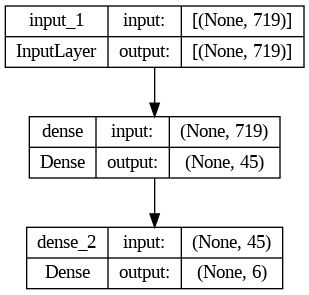

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import plot_model
import wandb
# import create_convlstm_model

# Initialize Wandb
wandb.init(project='deep-learning-clustering')

# Load the dataset
df = pd.read_csv('Final.csv')

# Extract the 'Question' and 'Code' columns from the dataset
questions = df['Question'].values.tolist()
codes = df['Code'].values.tolist()

# Encode the codes into integers
label_encoder = LabelEncoder()
encoded_codes = label_encoder.fit_transform(codes)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(questions)

# Convert sparse matrix to dense array
tfidf_matrix = tfidf_matrix.toarray()

# Define the DEC model architecture
input_dim = tfidf_matrix.shape[1]
latent_dim = 45

input_layer = Input(shape=(input_dim,))
encoder = Dense(latent_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Define the clustering layer
num_clusters = len(np.unique(encoded_codes))
clustering_layer = Dense(num_clusters, activation='softmax')(encoder)
clustering_model = Model(inputs=input_layer, outputs=clustering_layer)

# Compile the clustering model
clustering_model.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy')

# Convert labels to one-hot encoding
one_hot_labels = pd.get_dummies(encoded_codes).values

# Train the clustering model
clustering_model.fit(tfidf_matrix, one_hot_labels, batch_size=5, epochs=6, callbacks=[wandb.keras.WandbCallback()])

# Print the accuracy
y_pred = np.argmax(clustering_model.predict(tfidf_matrix), axis=1)
accuracy = np.mean(y_pred == encoded_codes)
print("Accuracy:", accuracy)
wandb.log({"Accuracy": accuracy})

# Convert model summary to string and log it
model_summary = []
clustering_model.summary(print_fn=lambda x: model_summary.append(x))
model_summary = '\n'.join(model_summary)
wandb.log({"Model Summary": model_summary})

new_question = "Pandas and Numpy"
new_question_vector = vectorizer.transform([new_question])
new_question_vector = new_question_vector.toarray()
cluster_probs = clustering_model.predict(new_question_vector)
predicted_cluster = np.argmax(cluster_probs)

# Decode the predicted cluster back to the original code
code = label_encoder.inverse_transform([predicted_cluster])[0]

# Print the corresponding code
print("Predicted Code:", code)
questions_with_code = df[df['Code'] == code]['Question'].values
print("Questions with the predicted code:")
for question in questions_with_code:
    print(question)

# clustering_model.summary()
# # convdec_model = create_convdec_model()
# deep_embedded_model = clustering_model()
plot_model(clustering_model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)
# print("Model Created")